# Implementing K-means Algorithm 

In this implementation, I have generated a 2D dimensional data set is generated. The data is generated in such a way that it forms three clusters. Then K-means clustering is run on the data to indentify the three clusters. 

##### This is based on assignment in the Machine Learning specialization by University of Washington on Coursera

In [1]:
import numpy as np 
import pandas as pd
import math 
import operator
import random
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt                                # plotting
from scipy.stats import multivariate_normal                    # multivariate Gaussian distribution
import copy                                                    # deep copies

# image handling library
from PIL import Image
from io import BytesIO

In [3]:
# Generating synthetic data
def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        k = np.random.choice(len(weights), 1, p=weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data.append(x)
    return data


init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

# Generate data
np.random.seed(4)
data = generate_MoG_data(200, init_means, init_covariances, init_weights)

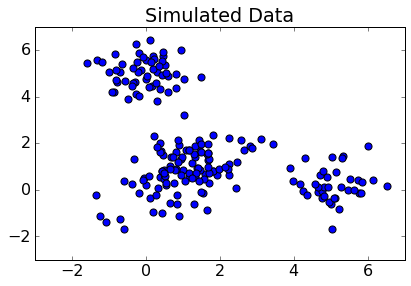

In [60]:
plt.figure()
d = np.vstack(data)
plt.scatter(d[:,0], d[:,1],s=50)
plt.rcParams.update({'font.size':16})
plt.tight_layout()
plt.title('Simulated Data')
plt.show()

In [94]:
centroid=np.zeros([3,2])

In [57]:
### Alternative initialization of Cluster centers
chosen=np.random.choice(len(data), 3, replace=False)
centroid=[data[x] for x in chosen]
centroid=np.vstack(centroid)

In [95]:
for i in range(0,3):
    centroid[i][0]=random.randrange(-4,8)
    centroid[i][1]=random.randrange(-4,8)

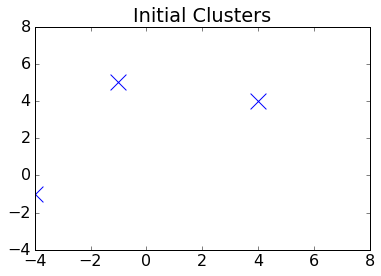

In [96]:
plt.scatter(centroid[:,0], centroid[:,1],marker="x",s=250)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.title('Initial Clusters')

In [97]:
assign=np.zeros([200,1])  

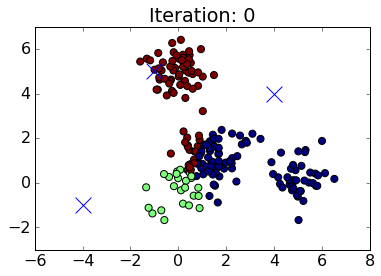

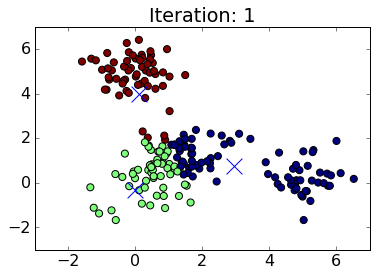

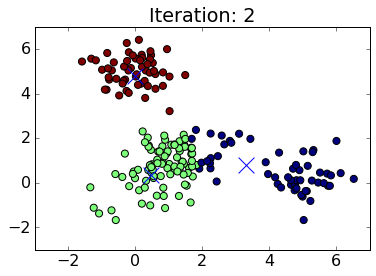

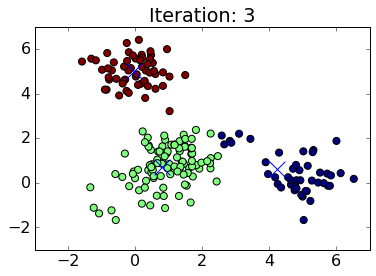

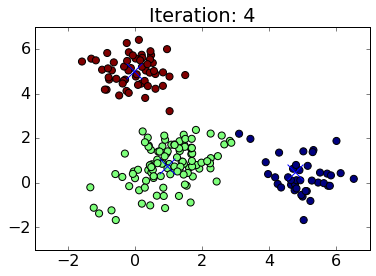

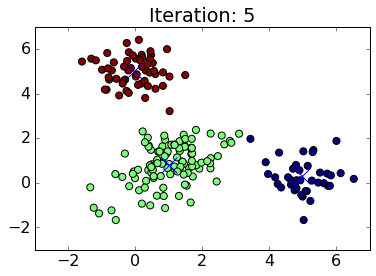

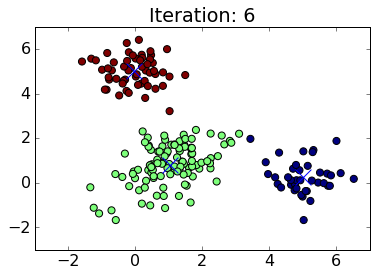

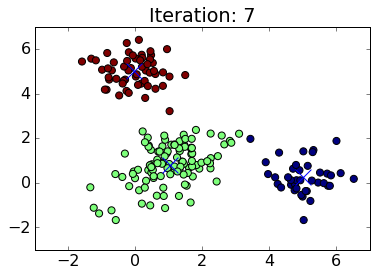

In [98]:
 for a in range(0,8):
    for i in range(0,200):
        dist=[0,0,0]
        for k in range(0,3):
            dist[k]=math.sqrt(math.pow((data[i][0]-centroid[k][0]),2)+math.pow((data[i][1]-centroid[k][1]),2))
        dist_min=dist[0]
        cent=0
        for k in range(1,3):
            if dist[k]<=dist_min:
                dist_min=dist[k]
                cent=k
        assign[i]=cent+1
    
    mean=[[0,0],[0,0],[0,0]]
    count=[0,0,0]
    
    for k in range(0,200):
        if assign[k]==1.:
            mean[0][0]+=data[k][0]
            mean[0][1]+=data[k][1]
            count[0]+=1
        if assign[k]==2.:
            mean[1][0]+=data[k][0]
            mean[1][1]+=data[k][1]
            count[1]+=1
        if assign[k]==3.:
            mean[2][0]+=data[k][0]
            mean[2][1]+=data[k][1]
            count[2]+=1
    
    plt.scatter(d[:,0], d[:,1],c=assign,s=50)
    plt.scatter(centroid[:,0], centroid[:,1],marker="x",s=250)
    plt.title("Iteration: "+str(a))
    plt.show()
    
    centroid[0][0]=mean[0][0]/count[0]
    centroid[0][1]=mean[0][1]/count[0]

    centroid[1][0]=mean[1][0]/count[1]
    centroid[1][1]=mean[1][1]/count[1]

    centroid[2][0]=mean[2][0]/count[2]
    centroid[2][1]=mean[2][1]/count[2]  
    